In [1]:
require 'cudnn'
require 'inn'
require 'image'

-- Loads the mapping from net outputs to human readable labels
function load_synset()
  local file = io.open 'synset_words.txt'
  local list = {}
  while true do
    local line = file:read()
    if not line then break end
    table.insert(list, string.sub(line,11))
  end
  return list
end

-- Converts an image from RGB to BGR format and subtracts mean
function preprocess(im, img_mean)
  -- rescale the image
  local im3 = image.scale(im,224,224,'bilinear')*255
  -- RGB2BGR
  local im4 = im3:clone()
  im4[{1,{},{}}] = im3[{3,{},{}}]
  im4[{3,{},{}}] = im3[{1,{},{}}]

  -- subtract imagenet mean
  return im4 - image.scale(img_mean, 224, 224, 'bilinear')
end

-- Setting up networks 
print '==> Loading network'

--net = torch.load('/home/yusheng/Workspace/DeepLearning/models/zeilerNet/zeilerNet.net')
net = torch.load('/usr/local/data/zeilerNet/zeilerNet.net')
net:cuda()
-- as we want to classify, let's disable dropouts by enabling evaluation mode
net:evaluate()

print '==> Loading synsets'
synset_words = load_synset()

print '==> Loading image and imagenet mean'
--image_name = 'Goldfish3.jpg'
image_name = 'lena.jpg'
img_mean_name = 'ilsvrc_2012_mean.t7'

im = image.load(image_name)
img_mean = torch.load(img_mean_name).img_mean:transpose(3,1)

-- Have to resize and convert from RGB to BGR and subtract mean
print '==> Preprocessing'
I = preprocess(im, img_mean)

_,classes = net:forward(I:cuda()):view(-1):float():sort(true)

for i=1,5 do
  print('predicted class '..tostring(i)..': ', synset_words[classes[i] ])
end



==> Loading network	


==> Loading synsets	


==> Loading image and imagenet mean	


==> Preprocessing	


predicted class 1: 	hair spray	
predicted class 2: 	brassiere, bra, bandeau	
predicted class 3: 	wig	
predicted class 4: 	maillot, tank suit	
predicted class 5: 	maillot	


In [2]:
print(net)

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> output]
  (1): nn.Sequential {
    [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> (13) -> (14) -> output]
    (1): cudnn.SpatialConvolution(3 -> 96, 7x7, 2,2, 1,1)
    (2): cudnn.ReLU
    (3): inn.SpatialSameResponseNormalization
    (4): cudnn.SpatialMaxPooling
    (5): cudnn.SpatialConvolution(96 -> 256, 5x5, 2,2)
    (6): cudnn.ReLU
    (7): inn.SpatialSameResponseNormalization
    (8): cudnn.SpatialMaxPooling
    (9): cudnn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)
    (10): cudnn.ReLU
    (11): cudnn.SpatialConvolution(384 -> 384, 3x3, 1,1, 1,1)
    (12): cudnn.ReLU
    (13): cudnn.SpatialConvolution(384 -> 256, 3x3, 1,1, 1,1)
    (14): cudnn.ReLU
  }
  (2): inn.SpatialPyramidPooling
  (3): nn.Sequential {
    [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> output]
    (1): nn.Linear(12800 -> 4096)
    (2): cudnn.ReLU
    (3): nn.Dropout(0.500000)
    (4): nn.Linear(40

          gradInput : CudaTensor - empty
          modules : 
            {
              1 : 
                cudnn.SpatialConvolution(3 -> 96, 7x7, 2,2, 1,1)
                {
                  padW : 1
                  nInputPlane : 3
                  output : CudaTensor - size: 96x110x110
                  gradInput : CudaTensor - size: 3x224x224
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40f0e430
                  iSize : LongStorage - size: 4
                  convDesc : cdata<struct cudnnConvolutionStruct *[1]>: 0x40f15928
                  output_offset : 1161600
                  gradBias : CudaTensor - size: 96
                  algType : cdata<enum 761 [?]>: 0x41ff5b88
                  extraBuffer : CudaTensor - size: 147
                  extraBufferSizeInBytes : 588
                  oDescForBias : cdata<struct cudnnTensorStruct *[1]>: 0x40fda2e8
                  oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x415048d0
                  groups : 

                dH : 2
                  dW : 2
                  nOutputPlane : 96
                  bias : CudaTensor - size: 96
                  kH : 7
                  weight_offset : 14112
                  finput : CudaTensor - empty
                  biasDesc : cdata<struct cudnnTensorStruct *[1]>: 0x401e2170
                  input_offset : 150528
                  weight : CudaTensor - size: 96x3x7x7
                  train : false
                  gradWeight : CudaTensor - size: 96x3x7x7
                  fgradInput : CudaTensor - empty
                  kW : 7
                  padH : 1
                  weightDesc : cdata<struct cudnnFilterStruct *[1]>: 0x40c11d60
                }
              2 : 
                cudnn.ReLU
                {
                  inplace : true
        

          mode : CUDNN_ACTIVATION_RELU
                  train : false
                  output : CudaTensor - size: 96x110x110
                  gradInput : CudaTensor - empty
                  nElem : 1161600
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40fc9610
                }
              3 : 
                inn.SpatialSameResponseNormalization
                {
                  alpha : 5e-05
                  train : false
                  output : CudaTensor - size: 96x110x110
                  gradInput : CudaTensor - empty
                  size : 3
                  beta : 0.75
                  modules : nn.Sequential {
  [input -> (1) -> (2) -> output]
  (1): nn.ConcatTable {
    input
      |`-> (1): nn.Identity
      |`-> (2): nn.Sequential {
      |      [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> output]
      |      (1): nn.SpatialZeroPadding(l=1,r=1,t=1,b=1)
      |      (2): nn.Power
      |      (3): nn.SpatialAveragePooling(3,3,1,1

         dW : 2
                  padH : 0
                  gradInput : CudaTensor - size: 96x110x110
                  oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x409bea30
                  iSize : LongStorage - size: 4
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40fb2018
                  poolDesc : cdata<struct cudnnPoolingStruct *[1]>: 0x4130ac98
                  mode : CUDNN_POOLING_MAX
                  train : false
                  kW : 3
                  ceil_mode : true
                  padW : 0
                  output : CudaTensor - size: 96x55x55
                  kH : 3
                }
              5 : 
                cudnn.SpatialConvolution(96 -> 256, 5x5, 2,2)
                {
                  padW : 0
                  nInputPlane : 96
      

            output : CudaTensor - size: 256x26x26
                  gradInput : CudaTensor - size: 96x55x55
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x413049a8
                  iSize : LongStorage - size: 4
                  convDesc : cdata<struct cudnnConvolutionStruct *[1]>: 0x40b8e240
                  output_offset : 173056
                  gradBias : CudaTensor - size: 256
                  algType : cdata<enum 761 [?]>: 0x409bc9a0
                  extraBuffer : CudaTensor - size: 2400
                  extraBufferSizeInBytes : 9600
                  oDescForBias : cdata<struct cudnnTensorStruct *[1]>: 0x40b89aa0
                  oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41ff7ec0
                  groups : 1
                  dH : 2
                  dW : 2
                  nOutputPlane : 256
                  bias : CudaTensor - size: 256
                  kH : 5
                  weight_offset : 614400
                  finput : CudaTensor - em

train : false
                  gradWeight : CudaTensor - size: 256x96x5x5
                  fgradInput : CudaTensor - empty
                  kW : 5
                  padH : 0
                  weightDesc : cdata<struct cudnnFilterStruct *[1]>: 0x409aebe8
                }
              6 : 
                cudnn.ReLU
                {
                  inplace : true
                  mode : CUDNN_ACTIVATION_RELU
                  train : false
                  output : CudaTensor - size: 256x26x26
                  gradInput : CudaTensor - empty
                  nElem : 173056
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x408433a0
                }
              7 : 
                inn.SpatialSameResponseNormalization
                {
                  alpha : 5e-05
                  train : false
                  output : CudaTensor - size: 256x26x26
     

             gradInput : CudaTensor - empty
                  size : 3
                  beta : 0.75
                  modules : nn.Sequential {
  [input -> (1) -> (2) -> output]
  (1): nn.ConcatTable {
    input
      |`-> (1): nn.Identity
      |`-> (2): nn.Sequential {
      |      [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> output]
      |      (1): nn.SpatialZeroPadding(l=1,r=1,t=1,b=1)
      |      (2): nn.Power
      |      (3): nn.SpatialAveragePooling(3,3,1,1)
      |      (4): nn.MulConstant
      |      (5): nn.AddConstant
      |      (6): nn.Power
      |    }
       ... -> output
  }
  (2): nn.CDivTable
}
                }
              8 : 
                cudnn.SpatialMaxPooling
                {
                  dH : 2
                  dW : 2
                  padH : 0
                  gradInput : CudaTensor - size: 256x26x26
                  oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40b78a68
                  iSize : LongStorage - size: 4
           

  ceil_mode : true
                  padW : 0
                  output : CudaTensor - size: 256x13x13
                  kH : 3
                }
              9 : 
                cudnn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)
                {
                  padW : 1
                  nInputPlane : 256
                  output : CudaTensor - size: 384x13x13
                  gradInput : CudaTensor - size: 256x13x13
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40b87818
                  iSize : LongStorage - size: 4
                  convDesc : cdata<struct cudnnConvolutionStruct *[1]>: 0x40750cc8
                  output_offset : 64896
                  gradBias : CudaTensor - size: 384
                  algType : cdata<enum 761 [?]>: 0x409c41d8
                  extraBuffer : CudaTensor - size: 2304
                  extraBufferSizeInBytes : 9216
                  oDescForBias : cdata<struct cudnnTensorStruct *[1]>: 0x40b8d058
                  oDesc : cd

    groups : 1
                  dH : 1
                  dW : 1
                  nOutputPlane : 384
                  bias : CudaTensor - size: 384
                  kH : 3
                  weight_offset : 884736
                  finput : CudaTensor - empty
                  biasDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41cf0f60
                  input_offset : 43264
                  weight : CudaTensor - size: 384x256x3x3
                  train : false
                  gradWeight : CudaTensor - size: 384x256x3x3
                  fgradInput : CudaTensor - empty
                  kW : 3
                  padH : 1
                  weightDesc : cdata<struct cudnnFilterStruct *[1]>: 0x40750918
                }
              10 : 
                cudnn.ReLU
                {
                  inplace : true
                  

mode : CUDNN_ACTIVATION_RELU
                  train : false
                  output : CudaTensor - size: 384x13x13
                  gradInput : CudaTensor - empty
                  nElem : 64896
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41905788
                }
              11 : 
                cudnn.SpatialConvolution(384 -> 384, 3x3, 1,1, 1,1)
                {
                  padW : 1
                  nInputPlane : 384
                  output : CudaTensor - size: 384x13x13
                  gradInput : CudaTensor - size: 384x13x13
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x409aac28
                  iSize : LongStorage - size: 4
                  convDesc : cdata<struct cudnnConvolutionStruct *[1]>: 0x40b92390
                  output_offset : 64896
                  gradBias : CudaTensor - size: 384
                  algType : cdata<enum 761 [?]>: 0x41ffe488
                  extraBuffer : CudaTensor - size: 3456
           

                  groups : 1
                  dH : 1
                  dW : 1
                  nOutputPlane : 384
                  bias : CudaTensor - size: 384
                  kH : 3
                  weight_offset : 1327104
                  finput : CudaTensor - empty
                  biasDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40b7b098
                  input_offset : 64896
                  weight : CudaTensor - size: 384x384x3x3
                  train : false
                  gradWeight : CudaTensor - size: 384x384x3x3
                  fgradInput : CudaTensor - empty
                  kW : 3
                  padH : 1
                  weightDesc : cdata<struct cudnnFilterStruct *[1]>: 0x41310ed8
                }
              12 : 
                cudnn.ReLU
                {
                  inplace : true
                  mode : CUDNN_ACTIVATION_RELU
  

                train : false
                  output : CudaTensor - size: 384x13x13
                  gradInput : CudaTensor - empty
                  nElem : 64896
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x4151cca0
                }
              13 : 
                cudnn.SpatialConvolution(384 -> 256, 3x3, 1,1, 1,1)
                {
                  padW : 1
                  nInputPlane : 384
                  output : CudaTensor - size: 256x13x13
                  gradInput : CudaTensor - size: 384x13x13
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x4074d688
                  iSize : LongStorage - size: 4
                  convDesc : cdata<struct cudnnConvolutionStruct *[1]>: 0x40fb0e78
                  output_offset : 43264
                  gradBias : CudaTensor - size: 256
                  algType : cdata<enum 761 [?]>: 0x40b86158
                  extraBuffer : CudaTensor - size: 3456
                  extraBufferSizeInBytes :

                 dH : 1
                  dW : 1
                  nOutputPlane : 256
                  bias : CudaTensor - size: 256
                  kH : 3
                  weight_offset : 884736
                  finput : CudaTensor - empty
                  biasDesc : cdata<struct cudnnTensorStruct *[1]>: 0x418f0098
                  input_offset : 64896
                  weight : CudaTensor - size: 256x384x3x3
                  train : false
                  gradWeight : CudaTensor - size: 256x384x3x3
                  fgradInput : CudaTensor - empty
                  kW : 3
                  padH : 1
                  weightDesc : cdata<struct cudnnFilterStruct *[1]>: 0x413081e8
                }
              14 : 
                cudnn.ReLU
                {
                  inplace : true
                  mode : CUDNN_ACTIVATION_RELU
                  train : false
                  output : CudaTensor - size: 256x13x13
                  gradInput : CudaTensor - empty
   

     nElem : 43264
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x401e8d38
                }
            }
          train : false
          output : CudaTensor - size: 256x13x13
        }
      2 : 
        inn.SpatialPyramidPooling
        {
          pyr : 
            {
              1 : 
                {
                  1 : 1
                  2 : 1
                }
              2 : 
                {
                  1 : 2
                  2 : 2
                }
              3 : 
                {
                  1 : 3
                  2 : 3
                }
              4 : 
                {
                  1 : 6
         

         2 : 6
                }
            }
          train : false
          output : CudaTensor - size: 12800
          gradInput : CudaTensor - empty
          module : 
            nn.Concat {
              input
                |`-> (1): nn.Sequential {
                |      [input -> (1) -> (2) -> output]
                |      (1): nn.SpatialAdaptiveMaxPooling
                |      (2): nn.View
                |    }
                |`-> (2): nn.Sequential {
                |      [input -> (1) -> (2) -> output]
                |      (1): nn.SpatialAdaptiveMaxPooling
                |      (2): nn.View
                |    }
                |`-> (3): nn.Sequential {
                |      [input -> (1) -> (2) -> output]
                |      (1): nn.SpatialAdaptiveMaxPooling
                |      (2): nn.View
                |    }
                |`-> (4): nn.Sequential {
                |      [input -> (1) -> (2) -> output]
                |      (1): nn.SpatialAdapti

 3 : 
        nn.Sequential {
          [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> output]
          (1): nn.Linear(12800 -> 4096)
          (2): cudnn.ReLU
          (3): nn.Dropout(0.500000)
          (4): nn.Linear(4096 -> 4096)
          (5): cudnn.ReLU
          (6): nn.Dropout(0.500000)
          (7): nn.Linear(4096 -> 1000)
        }
        {
          gradInput : CudaTensor - empty
          modules : 
            {
              1 : 
                nn.Linear(12800 -> 4096)
                {
                  gradBias : CudaTensor - size: 4096
                  weight : CudaTensor - size: 4096x12800
                  train : false
                  bias : CudaTensor - size: 4096
                  gradInput : CudaTensor - empty
                  output : CudaTensor - size: 4096
                  gradWeight : CudaTensor - size: 4096x12800
                }
              2 : 
                cudnn.ReLU
                {
                  inplace : true
          

                  nElem : 4096
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40489618
                }
              3 : 
                nn.Dropout(0.500000)
                {
                  v2 : false
                  noise : CudaTensor - empty
                  train : false
                  p : 0.5
                  gradInput : CudaTensor - empty
                  output : CudaTensor - size: 4096
                }
              4 : 
                nn.Linear(4096 -> 4096)
                {
                  gradBias : CudaTensor - size: 4096
                  weight : CudaTensor - size: 4096x4096
                  train : false
                  bias : CudaTensor - size: 4096
                  gradInput : CudaTensor - empty
                  output : CudaTensor - size: 4096
                  gradWeight : CudaTensor - size: 4096x4096
  

              }
              5 : 
                cudnn.ReLU
                {
                  inplace : true
                  mode : CUDNN_ACTIVATION_RELU
                  train : false
                  output : CudaTensor - size: 4096
                  gradInput : CudaTensor - empty
                  nElem : 4096
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x4048f0b8
                }
              6 : 
                nn.Dropout(0.500000)
                {
                  v2 : false
                  noise : CudaTensor - empty
                  train : false
                  p : 0.5
                  gradInput : CudaTensor - empty
                  output : CudaTensor - size: 4096
                }
              7 : 
                nn.Linear(4096 -> 1000)
       

         {
                  gradBias : CudaTensor - size: 1000
                  weight : CudaTensor - size: 1000x4096
                  train : false
                  bias : CudaTensor - size: 1000
                  gradInput : CudaTensor - empty
                  output : CudaTensor - size: 1000
                  gradWeight : CudaTensor - size: 1000x4096
                }
            }
          train : false
          output : CudaTensor - size: 1000
        }
    }
  train : false
  output : CudaTensor - size: 1000
}


In [25]:
require 'modules/SpatialDeconvolution'
require 'modules/SpatialUnPooling'

conv2_fm = net:get(1):get(6).output
conv2_fm_relu = net:get(1):get(5).output
print(conv2_fm:size())
--itorch.image(conv2_fm)
neuron_num = 111
itorch.image(conv2_fm[{{neuron_num },{},{}}])

timer = torch.Timer()
deconv2 = cudnn.SpatialDeconvolution( net:get(1):get(5), net:get(1):get(4).output:size(2), neuron_num )
pool1_fm_c2 = deconv2:forward(conv2_fm)
print(pool1_fm_c2:size())
print('==> Time elapsed: ' .. timer:time().real .. ' seconds')
--print(conv4_fm:size())


 256
  26
  26
[torch.LongStorage of size 3]




  1
 96
 55
 55
[torch.LongStorage of size 4]

==> Time elapsed: 0.1261739730835 seconds	


In [27]:
timer = torch.Timer()
unpool1 = cudnn.SpatialUnPooling(net:get(1):get(4), net:get(1):get(1).output )
conv1_fm_c2 = unpool1:forward(pool1_fm_c2[1])
print(conv1_fm_c2:size())
print('==> Time elapsed: ' .. timer:time().real .. ' seconds')


  96
 110
 110
[torch.LongStorage of size 3]

==> Time elapsed: 8.1965339183807 seconds	


In [22]:
--conv1_fm_c2_188 = cudnn.ReLU( true ):forward( conv1_fm_c2_188 )


   1
   3
 224
 224
[torch.LongStorage of size 4]

==> Time elapsed: 0.10198187828064 seconds	


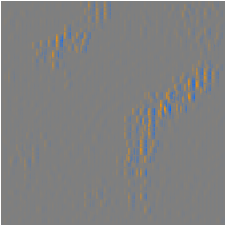

In [28]:
timer = torch.Timer()
deconv1 = cudnn.SpatialDeconvolution( net:get(1):get(1), I:size(2), true )
vis_fm_c2 = deconv1:forward(conv1_fm_c2)
print(vis_fm_c2:size())
print('==> Time elapsed: ' .. timer:time().real .. ' seconds')
itorch.image(vis_fm_c2)

In [7]:
timer = torch.Timer()
unpool1 = cudnn.SpatialUnPooling(net:get(1):get(4), net:get(1):get(3).output )
conv1_fm = unpool1:forward(net:get(1):get(4).output)
print(conv1_fm:size())
print('==> Time elapsed: ' .. timer:time().real .. ' seconds')


  96
 110
 110
[torch.LongStorage of size 3]

==> Time elapsed: 7.8949699401855 seconds	



  96
   3
 224
 224
[torch.LongStorage of size 4]

==> Time elapsed: 0.22410082817078 seconds	


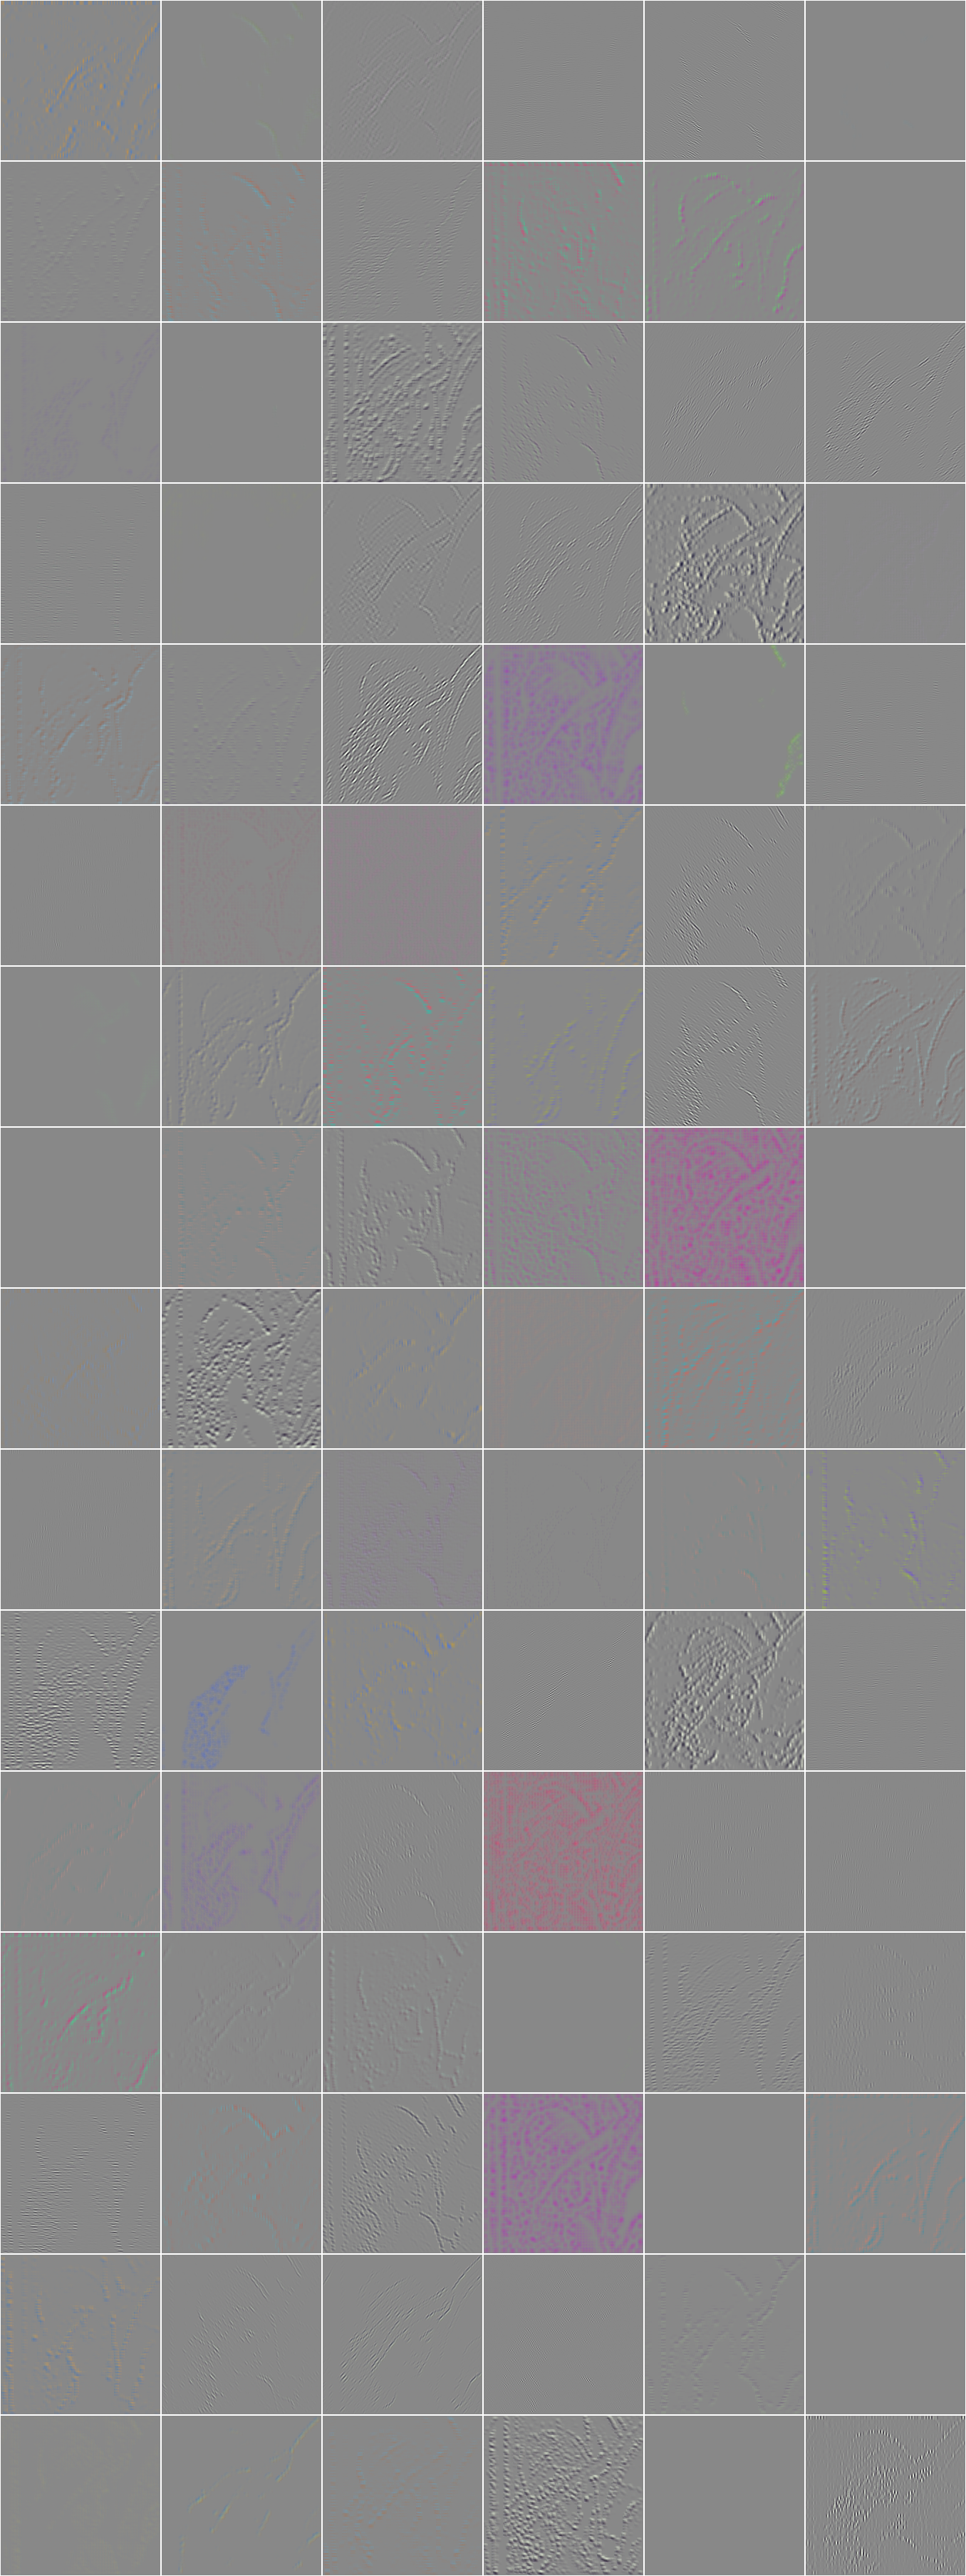

In [42]:
timer = torch.Timer()
deconv1 = cudnn.SpatialDeconvolution( net:get(1):get(1), I:size(2), true )
vis_conv1_fm = deconv1:forward(conv1_fm )
print(vis_conv1_fm:size())
print('==> Time elapsed: ' .. timer:time().real .. ' seconds')
itorch.image(vis_conv1_fm)